## Linear Regression
### Name: Matthew Mella
### Date: 11/28/23

In [1]:
import numpy as np
import pandas as pd
import time
import statsmodels.api as sm
from sklearn import linear_model
from itertools import combinations
from matplotlib import pyplot as plt

## Problem 1
Write a function that takes as input $X$ and **y** as defined on page 1. Call this function **ols**. This function should return the least squares estimator for $\beta$ as a numpy array.

In [26]:
def ols(X, y):
    """
    Solves for the least squares estimator.
    Add a column of 1s to X.
    Parameters:
        X: n x d numpyarray
        y: n x 1 numpyarray
    Returns:
        beta: d x 1 numpyarray
    """
    # Add a column of 1s to X
    X = sm.add_constant(X)
    
    # Solve for beta.
    beta = np.linalg.solve(X.T @ X, X.T @ y)
    return beta

## Problem 2
Find the least squares estimator for $\beta$ using this random data. 
Produce a plot showing the random data and the line of best fit determined by the least squares estimator for $\beta$. 
Your plot should include a title, axis labels, and a legend. 

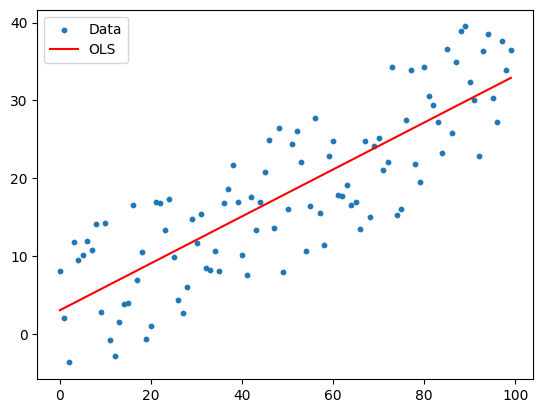

In [25]:
n = 100 # Number of points to generate
X = np.arange(100) # The input X for the function ols
eps = np.random.uniform(-10,10, size=(100,)) # Noise to generate random y coordinates
y = .3*X + 3 + eps # The input y for the function ols

# find the least squares estimator for beta
beta = ols(X, y)

# Plot the data and the least squares estimate
plt.scatter(X, y, label='Data', s=10)
plt.plot(X, beta[0] + beta[1]*X, color='red', label='OLS')
plt.legend()
plt.show()


## Problem 3
Write a function that finds the least squares estimator for rank-deficient models using the SVD. 
The function should still take $X$ and **y** as inputs. Call the function **svd_ols** and return the least squares estimator for $\beta$ as a numpy array.

In [24]:
def svd_ols(X, y):
    """
    Solves for the least squares estimator using the SVD.
    Add a column of 1s to X.
    Parameters:
        X: n x d numpyarray
        y: n x 1 numpyarray
    Returns:
        beta: d x 1 numpy array
    """
    X = sm.add_constant(X)
    # Solve for beta using the SVD.
    U, s, V = np.linalg.svd(X, full_matrices=False)
    return V.T @ np.diag(1/s) @ U.T @ y

## Problem 4
Use your function **svd_ols** to find the least squares estimator for a cubic polynomial. 
Create a plot that shows a scatter plot of the data and a curve using the least squares estimator. 
Your plot should include a title, axis labels, and a legend.

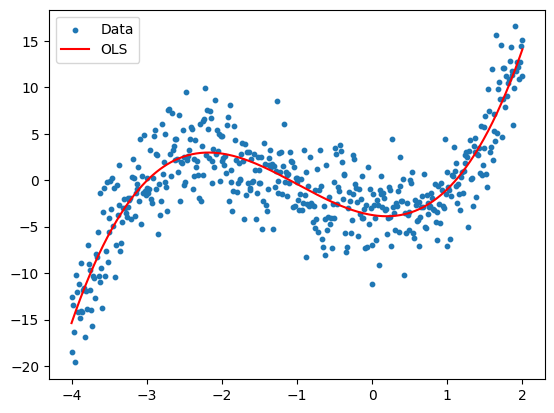

In [27]:
x = np.linspace(-4, 2, 500)
y = x**3 + 3*x**2 - x - 3.5
eps = np.random.normal(0, 3, len(y)) # Create noise
y += eps # Add noise to randomize data

# find the least squares estimator for beta
X = [x, x**2, x**3]
X = np.array(X).T
beta = svd_ols(X, y)

# Plot the data and the least squares estimate
plt.scatter(x, y, label='Data', s=10)
plt.plot(x, beta[0] + beta[1]*x + beta[2]*x**2 + beta[3]*x**3, color='red', label='OLS')
plt.legend()
plt.show()

## Problem 5
The file **realestate.csv** contains transaction data from 2012-2013. 
It has columns for transaction data, house age, distance to nearest MRT station, number of convenience stores, latitude, longitude, and house price of unit area.
Each row in the array is a separate measurement.

Find the combination of variables that builds the model with the best $R^2$ value when predicting **house price of unit area**. Use statsmodels to build each model and calculate $R^2$. Use **statsmodels** to build each model and calculate $R^2$. Using the same combination of variables, time the methods **ols**, **svd_ols**, and **statsmodels** . Return a list with the first element being a tuple of times for each method and the second element being the best $R^2$ value from the first part of the problem.

In [9]:
def problem5():
    """
    Find the best R2 value using statsmodels.
    Then time ols, svd_ols, and statsmodlels.
    Returns:
        list(): a tuple of times and the best R2 value
    """
    # load the data
    data = pd.read_csv('realestate.csv')
    # get the independent variables
    independent_vars = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
    
    # get all of the combinations of the independent variables
    combos = []
    for i in range(1, len(independent_vars) + 1):
        combos += list(combinations(independent_vars, i))

    # get the dependent variable
    y = 'Y house price of unit area'

    # find the best R2 value
    best_R2 = 0
    best_combination = None

    # iterate through all of the combinations and find the best R2 value
    for combination in combos:
        X = sm.add_constant(data[list(combination)])
        y = data['Y house price of unit area']
        model = sm.OLS(y, X).fit()
        if model.rsquared > best_R2:
            best_R2 = model.rsquared
            best_combination = list(combination)

    X = data[best_combination]
    # time all of the methods
    times = []

    # time ols
    start = time.time()
    model = ols(y, X)
    end = time.time()
    # add the time to the list
    times.append(end - start)
    # time svd ols
    start = time.time()
    model = svd_ols(y, X)
    end = time.time()
    # add the time to the list
    times.append(end - start)

    # time sm ols
    start = time.time()
    model = sm.OLS(y, X).fit()
    end = time.time()
    # add the time to the list
    times.append(end - start)

    return tuple(times), best_R2

problem5()

((0.004541873931884766, 0.0007989406585693359, 0.0002911090850830078),
 0.5711617064827428)

## Problem 6
Use the file **realestate.csv** and the Python Example on page 4 as a template for constructing **y** and $X$ and calculating model AIC and BIC. 
For the dependent variable, use **house price of unit area**. 
For the independent variables, use **distance to the nearest MRT station**, **number of convenience stores**, **latitude**, and **longitude**.

Find the model that has the lowest AIC and the model that has the lowest BIC. Are they the same model? Print the features of the model with the lowest AIC as a list.

In [17]:
def problem5():
    """
    Find the best R2 value using statsmodels.
    Then time ols, svd_ols, and statsmodlels.
    Returns:
        list(): a tuple of times and the best R2 value
    """
    # load the data
    data = pd.read_csv('realestate.csv')
    # get the independent variables
    independent_vars = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
    
    # get all of the combinations of the independent variables
    combos = []
    for i in range(1, len(independent_vars) + 1):
        combos += list(combinations(independent_vars, i))

    # get the dependent variable
    y = 'Y house price of unit area'

    # find the best AIC and BIC values
    best_AIC = np.inf
    best_BIC = np.inf
    best_combination_AIC = None
    best_combination_BIC = None
    best_coefficients_AIC = None
    best_coefficients_BIC = None

    # iterate through all of the combinations and find the best R2 value
    for combination in combos:
        X = sm.add_constant(data[list(combination)])
        y = data['Y house price of unit area']
        model = sm.OLS(y, X).fit()
        if model.aic < best_AIC:
            best_AIC = model.aic
            best_combination_AIC = list(combination)
            best_coefficients_AIC = model.params
        if model.bic < best_BIC:
            best_BIC = model.bic
            best_combination_BIC = list(combination)
            best_coefficients_BIC = model.params

    
    # print the features with the best AIC and BIC values
    print('Best AIC: ', best_combination_AIC, 'Score: ', best_AIC, 'Coefficients: ', best_coefficients_AIC)
    print('Best BIC: ', best_combination_BIC, 'Score: ', best_BIC, 'Coefficients: ', best_coefficients_BIC)


problem5()

Best AIC:  ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude'] Score:  2994.9145648981444 Coefficients:  const                                    -5916.006496
X2 house age                                -0.268719
X3 distance to the nearest MRT station      -0.004175
X4 number of convenience stores              1.164781
X5 latitude                                238.635735
dtype: float64
Best BIC:  ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude'] Score:  3015.043894767271 Coefficients:  const                                    -5916.006496
X2 house age                                -0.268719
X3 distance to the nearest MRT station      -0.004175
X4 number of convenience stores              1.164781
X5 latitude                                238.635735
dtype: float64


The same model is best for AIC and BIC

## Problem 7
Use Ridge and Lasso Regression to model **house price of unit area** from the file **realestate.csv**.
Before fitting each model, run a GridSearch on $\alpha$ to find the optimal value.
Then use the optimal $\alpha$ to fit the model.
Once you have fit the model, you can use the **score** method to get $R^2$. 
Print $R^2$ for each model as a tuple. 

In [22]:
# load the data
data = pd.read_csv('realestate.csv')
# get the independent variables
independent_vars = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

y = 'Y house price of unit area'

X = sm.add_constant(data[independent_vars].values)
y = data['Y house price of unit area'].values

# Grid search for the alpha parameter for ridge and get the best alpha
ridge = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13)) # Range for grid search
ridge.fit(X, y)
r_alpha = ridge.alpha_

# Grid search for the alpha parameter for lasso and get the best alpha
lasso = linear_model.LassoCV(alphas=np.logspace(-6, 6, 13)) # Range for grid search
lasso.fit(X, y)
l_alpha = lasso.alpha_

# Get the R2 value for ridge
best_ridge = linear_model.Ridge(alpha=r_alpha)
best_ridge.fit(X, y)
ridge_R2 = best_ridge.score(X, y)

# Get the R2 value for lasso
best_lasso = linear_model.Lasso(alpha=l_alpha)
best_lasso.fit(X, y)
lasso_R2 = lasso.score(X, y)

# Print the R2 values as a tuple
print('Best R2 values for ridge and lasso: ')
print((ridge_R2, lasso_R2))

Best R2 values for ridge and lasso: 
(0.5711441577039904, 0.5710797337360003)
